<a href="https://colab.research.google.com/github/sanjogmish/Ted-Talk-Views-Prediction/blob/main/TED_Talk_Views_Prediction_edit1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df =pd.read_csv('/content/drive/MyDrive/Almabetter/Modules/files/data_ted_talks.csv')

In [3]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
talk_id,1,92,7,53,66,49,86,94,71,55
title,Averting the climate crisis,The best stats you've ever seen,Simplicity sells,Greening the ghetto,Do schools kill creativity?,Behind the design of Seattle's library,Letting go of God,Let's teach religion -- all religion -- in sch...,A life of purpose,My wish: A global day of film
speaker_1,Al Gore,Hans Rosling,David Pogue,Majora Carter,Sir Ken Robinson,Joshua Prince-Ramus,Julia Sweeney,Dan Dennett,Rick Warren,Jehane Noujaim
all_speakers,{0: 'Al Gore'},{0: 'Hans Rosling'},{0: 'David Pogue'},{0: 'Majora Carter'},{0: 'Sir Ken Robinson'},{0: 'Joshua Prince-Ramus'},{0: 'Julia Sweeney'},{0: 'Dan Dennett'},{0: 'Rick Warren'},{0: 'Jehane Noujaim'}
occupations,{0: ['climate advocate']},{0: ['global health expert; data visionary']},{0: ['technology columnist']},{0: ['activist for environmental justice']},"{0: ['author', 'educator']}",{0: ['architect']},"{0: ['actor', 'comedian', 'playwright']}","{0: ['philosopher', 'cognitive scientist']}","{0: ['pastor', 'author']}",{0: ['filmmaker']}
about_speakers,{0: 'Nobel Laureate Al Gore focused the world’...,"{0: 'In Hans Rosling’s hands, data sings. Glob...",{0: 'David Pogue is the personal technology co...,{0: 'Majora Carter redefined the field of envi...,"{0: ""Creativity expert Sir Ken Robinson challe...",{0: 'Joshua Prince-Ramus is best known as arch...,{0: 'Julia Sweeney creates comedic works that ...,{0: 'Dan Dennett thinks that human consciousne...,{0: 'Pastor Rick Warren is the author of <em>T...,{0: 'TED Prize winner Jehane Noujaim is a guts...
views,3523392,14501685,1920832,2664069,65051954,1208138,4636596,3781244,3998282,460994
recorded_date,2006-02-25,2006-02-22,2006-02-24,2006-02-26,2006-02-25,2006-02-23,2006-02-24,2006-02-02,2006-02-25,2006-02-26
published_date,2006-06-27,2006-06-27,2006-06-27,2006-06-27,2006-06-27,2006-07-10,2006-07-10,2006-07-18,2006-07-18,2006-07-25
event,TED2006,TED2006,TED2006,TED2006,TED2006,TED2006,TED2006,TED2006,TED2006,TED2006


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [5]:
# 'talk_id' consists of all unique values; no trend and must not influence target; to be dropped
df['talk_id'].nunique()

4005

In [6]:
# 'title' consists of all unique values; no trend and must not influence target; to be dropped or combined with another column
df['title'].nunique()

4005

In [7]:
df['speaker_1'].nunique()

3274

In [8]:
df['speaker_1'].value_counts().index

Index(['Alex Gendler', 'Iseult Gillespie', 'Emma Bryce', 'Daniel Finkel',
       'Hans Rosling', 'Alex Rosenthal', 'Greg Gage', 'Juan Enriquez',
       'Chris Anderson', 'Dan Ariely',
       ...
       'Jake Barton', 'Edmond Hui', 'Lidia Yuknavitch', 'Chris Bliss',
       'Natalie Jeremijenko', 'Penelope Boston', 'Lee Mokobe', ' Crush Club',
       'Alan Russell', 'Luca Turin'],
      dtype='object', length=3274)

In [9]:
dict_of_speakers_frequency = dict(zip(df['speaker_1'].value_counts().index , df['speaker_1'].value_counts().values))
list_of_frequent_speakers = list()
for key,value in dict_of_speakers_frequency.items():
  if value > 1:
    list_of_frequent_speakers.append(key)

In [10]:
len(list_of_frequent_speakers)

424

In [11]:
import numpy as np
import math

In [12]:
def convert(string):
    return eval(string)

In [13]:
df.loc[df['all_speakers'].isnull()==True]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
2927,23418,How prefab homes can transform affordable housing,Antón García-Abril,NaN,NaN,NaN,14934,2016-11-19,2018-09-04,TEDxYouth@Beaconstreet,en,"['en', 'es']",NaN,449,"['design', 'architecture', 'industrial design'...","{1015: 'Creative houses from reclaimed stuff',...",https://www.ted.com/talks/anton_garcia_abril_h...,When architect Antón García-Abril moved to Bos...,Subtitle Provided by JUFE MOOC Studio M Subtit...
3266,36384,Why we need to stop obsessing over World War II,Keith Lowe,NaN,NaN,NaN,103682,2014-11-15,2019-03-01,TEDxAthens,en,"['en', 'pt', 'sr']",NaN,1109,"['war', 'history', 'society', 'future', 'globa...","{1999: 'Why veterans miss war', 1651: 'What I ...",https://www.ted.com/talks/keith_lowe_why_we_ne...,Why are we so obsessed with World War II? Hist...,Hello everybody. Audience: Hello. Keith Lowe: ...
3290,36844,Why talent carries you further than fame,Maisie Williams,NaN,NaN,NaN,3677746,2019-02-03,2019-03-11,TEDxManchester,en,"['ar', 'de', 'el', 'en', 'es', 'fr', 'hu', 'pt...",NaN,982,"['art', 'entertainment', 'entrepreneur', 'tech...",{39192: 'Why medieval politics was nothing lik...,https://www.ted.com/talks/maisie_williams_why_...,You'd never know from her transformation into ...,Hi. I'm Maisie Williams. And I'm kind of just ...
3665,49223,Are we living in a simulation?,Zohreh Davoudi,NaN,NaN,NaN,485122,2019-10-08,2019-10-08,TED-Ed,en,"['ar', 'el', 'en', 'es', 'fa', 'fr', 'he', 'id...",NaN,249,"['TED-Ed', 'animation', 'education', 'technolo...","{26263: 'Does time exist?', 24106: 'How do you...",https://www.ted.com/talks/zohreh_davoudi_are_w...,"All life on Earth— living and inanimate, micro...","We live in a vast universe, on a small wet pla..."


In [14]:
df['all_speakers'] = np.where(df['all_speakers'].isnull(),'Empty',df['all_speakers'])

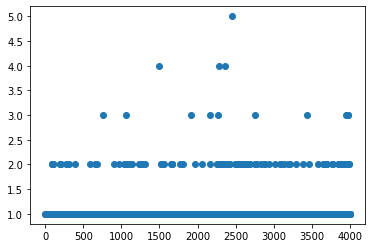

In [15]:
number_speakers_each_talk = list()
for i in df['all_speakers']:
  if i=='Empty':
    pass
  else:
    converted_dictionary = convert(i)
    number_speakers_each_talk.append(len(converted_dictionary.items()))
import matplotlib.pyplot as plt
x = range(1,4002)
plt.scatter(x,number_speakers_each_talk)

In [16]:
df['occupations'] = np.where(df['occupations'].isnull(),'Empty',df['occupations'])

In [17]:
occupations = list()
for i in df['occupations']:
    if i == 'Empty':
      pass
    else:
      converted_dictionary_occupation = convert(i)
      occupations.append(list(converted_dictionary_occupation.values()))

In [18]:
df['about_speakers'][5]

"{0: 'Joshua Prince-Ramus is best known as architect of the Seattle Central Library, already being hailed as a masterpiece of contemporary culture. Prince-Ramus was the founding partner of OMA New York—the American affiliate of the Office for Metropolitan Architecture (OMA) in the Netherlands—and served as its Principal until he renamed the firm REX in 2006.'}"

In [19]:
df['views'].describe()

count    4.005000e+03
mean     2.148006e+06
std      3.451226e+06
min      0.000000e+00
25%      8.820690e+05
50%      1.375508e+06
75%      2.133110e+06
max      6.505195e+07
Name: views, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


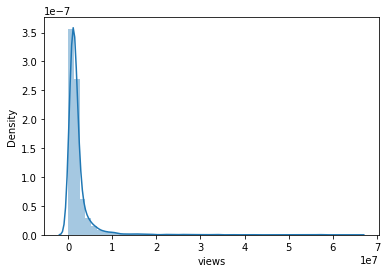

In [20]:
import seaborn as sns
sns.distplot(df['views'])

In [21]:
eval(df['recorded_date'][0][0:4])

2006

In [22]:
df.loc[df['recorded_date'].isnull()]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
3831,56629,The unpaid work that GDP ignores -- and why it...,Marilyn Waring,{0: 'Marilyn Waring'},{0: ['economist']},{0: 'Marilyn Waring advocates for a public pol...,1276272,NaN,2020-01-23,TEDxChristchurch,en,"['en', 'es', 'fr', 'it', 'ko', 'pt', 'tr', 'vi...",20.0,1039,"['global development', 'development', 'social ...",{46582: 'Why governments should prioritize wel...,https://www.ted.com/talks/marilyn_waring_the_u...,"If you: do laundry, are (or have been) pregnan...",(In Maori: My mountain is Taupiri.) (Waikato i...


In [23]:
df['recorded_date'] = np.where(df['recorded_date'].isnull(),'Empty',df['recorded_date'])

In [24]:
year_list = list()
for i in df['recorded_date']:
  if i == 'Empty':
    pass
  else:
     year_list.append(eval(i[0:4]))

In [25]:
unique_years = list(set(year_list))
unique_years

[1984,
 1990,
 1994,
 1998,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


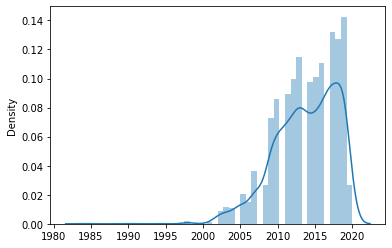

In [26]:
sns.distplot(year_list)

In [27]:
df['published_date'] = np.where(df['published_date'].isnull(),'Empty',df['published_date'])

In [28]:
year_list_published = list()
for i in df['published_date']:
  if i == 'Empty':
    pass
  else:
     year_list_published.append(eval(i[0:4]))

In [29]:
unique_years_published = list(set(year_list_published))
unique_years_published

[2016,
 2017,
 2018,
 2019,
 2020,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


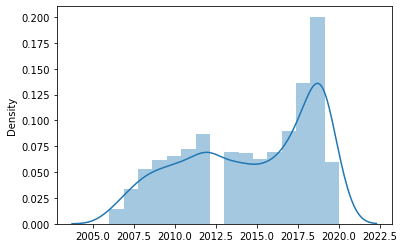

In [30]:
sns.distplot(year_list_published)

In [31]:
df['event'].nunique()

459

In [32]:
df['native_lang'].nunique()

12

In [33]:
languages_available = list()
for i in df['available_lang']:
  for j in eval(i):
    languages_available.append(j)
len(list(set(languages_available)))

114

In [34]:
df['comments'].describe()

count    3350.000000
mean      161.997015
std       268.838922
min         0.000000
25%        38.000000
50%        89.000000
75%       188.000000
max      6449.000000
Name: comments, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


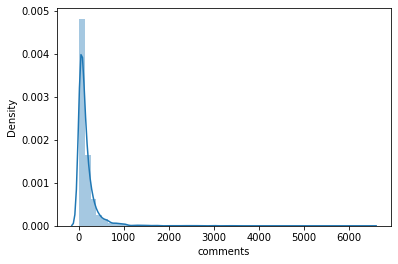

In [35]:
sns.distplot(df['comments'])

In [36]:
df['duration'].describe()

count    4005.000000
mean      724.011236
std       361.775462
min        60.000000
25%       393.000000
50%       738.000000
75%       974.000000
max      3922.000000
Name: duration, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


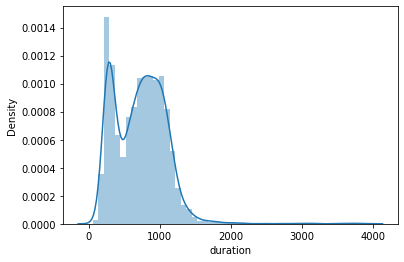

In [37]:
sns.distplot(df['duration'])

In [38]:
topics_list = list()
for i in df['topics']:
    for j in eval(i):
      topics_list.append(j)
unique_topics_list_list = list(set(topics_list))
len(unique_topics_list_list)

457

In [39]:
df['related_talks'][0]

'{243: \'New thinking on the climate crisis\', 547: \'The business logic of sustainability\', 2093: \'The state of the climate — and what we might do about it\', 54715: \'How we can turn the tide on climate\', 29968: \'The most important thing you can do to fight climate change: talk about it\', 2339: "Climate change is happening. Here\'s how we adapt"}'

In [40]:
df['description'][0]

'With the same humor and humanity he exuded in "An Inconvenient Truth," Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.'

In [41]:
df['transcript'][0]

'Thank you so much, Chris. And it\'s truly a great honor to have the opportunity to come to this stage twice; I\'m extremely grateful. I have been blown away by this conference, and I want to thank all of you for the many nice comments about what I had to say the other night. And I say that sincerely, partly because (Mock sob) I need that. (Laughter) Put yourselves in my position. (Laughter) I flew on Air Force Two for eight years. (Laughter) Now I have to take off my shoes or boots to get on an airplane! (Laughter) (Applause) I\'ll tell you one quick story to illustrate what that\'s been like for me. (Laughter) It\'s a true story — every bit of this is true. Soon after Tipper and I left the — (Mock sob) White House — (Laughter) we were driving from our home in Nashville to a little farm we have 50 miles east of Nashville. Driving ourselves. (Laughter) I know it sounds like a little thing to you, but — (Laughter) I looked in the rear-view mirror and all of a sudden it just hit me. Ther

## **BIVARIATE ANALYSIS**

In [42]:
highest_views_first_speakers = df.groupby('speaker_1')['views'].mean().sort_values(ascending=False).head(10)

Text(0, 0.5, 'average_views')

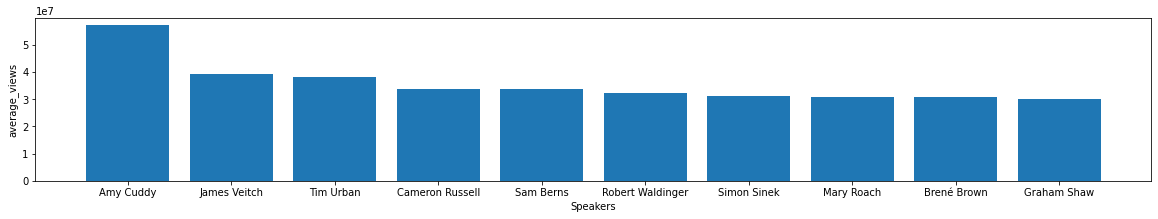

In [43]:
plt.rcParams['figure.figsize'] = (20,3)
plt.bar(highest_views_first_speakers.index , highest_views_first_speakers.values)
plt.xlabel('Speakers')
plt.ylabel('average_views')

In [44]:
df_copy = df.copy()
df_copy['all_speakers'] = df_copy['all_speakers'].apply(lambda x: eval(x) if x!='Empty' else 'Empty')
df_copy['all_speakers'] = df_copy['all_speakers'].apply(lambda x: len(x.items()) if x!='Empty' else 'Empty')

In [45]:
num_speakers_views = df_copy.groupby('all_speakers')['views'].mean().sort_values(ascending=False)

In [46]:
num_speakers_views_filtered = num_speakers_views.loc[num_speakers_views.index !='Empty']

Text(0, 0.5, 'average_views')

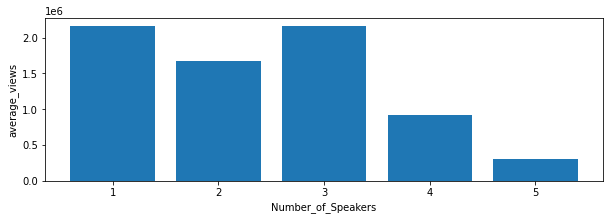

In [47]:
plt.rcParams['figure.figsize'] = (10,3)
plt.bar(num_speakers_views_filtered.index , num_speakers_views_filtered.values)
plt.xlabel('Number_of_Speakers')
plt.ylabel('average_views')

In [48]:
from datetime import date

In [49]:
date.fromisoformat('2021-11-17') - date.fromisoformat('2006-02-27') 

datetime.timedelta(days=5742)

In [50]:
df_copy['published_date'] = df_copy['published_date'].apply(lambda x:date.fromisoformat(x))

In [51]:
most_recent_date = df_copy['published_date'].max()

In [52]:
most_recent_date

datetime.date(2020, 4, 30)

In [53]:
for i in df_copy['published_date']:
      df_copy['avg_views_per_day'] = df_copy['views']/((most_recent_date - i).days)

In [54]:
df_copy.drop('avg_views_per_day',axis=1,inplace=True)

In [55]:
top_10_events_views = df.groupby('event')['views'].mean().sort_values(ascending=False).head(10)

<BarContainer object of 10 artists>

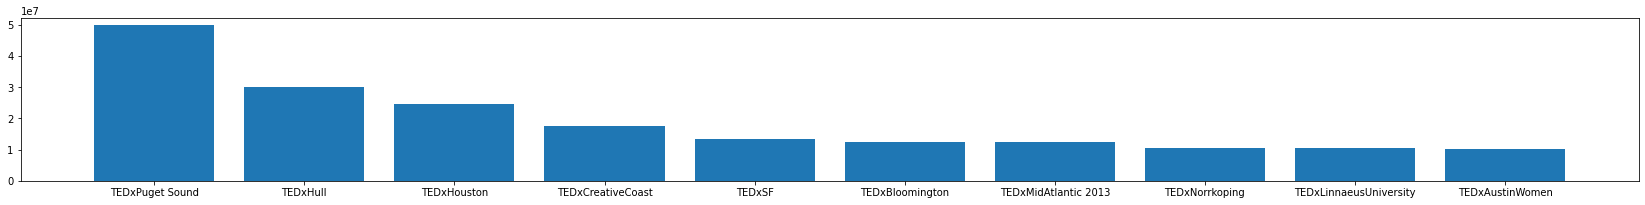

In [56]:
plt.rcParams['figure.figsize'] = (29,3) 
plt.bar(top_10_events_views.index,top_10_events_views.values)

In [57]:
native_language_views = df.groupby('native_lang')['views'].mean().sort_values(ascending=False)

In [58]:
sum_mean = native_language_views.values.sum()

<BarContainer object of 12 artists>

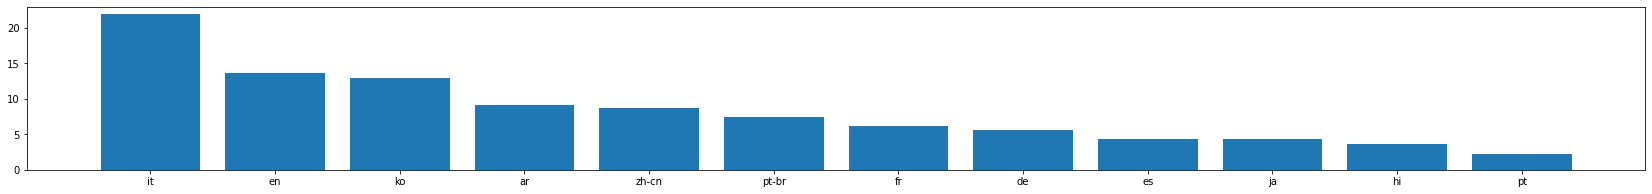

In [59]:
plt.rcParams['figure.figsize'] = (29,3) 
plt.bar(native_language_views.index,(native_language_views.values/sum_mean)*100)

In [60]:
df_copy['available_lang'] = df_copy['available_lang'].apply(lambda x:eval(x))

In [61]:
df_copy['available_lang'] = df_copy['available_lang'].apply(lambda x:len(x))

In [62]:
available_lang_views = df_copy.groupby('available_lang')['views'].mean()

Text(0, 0.5, 'avg_views')

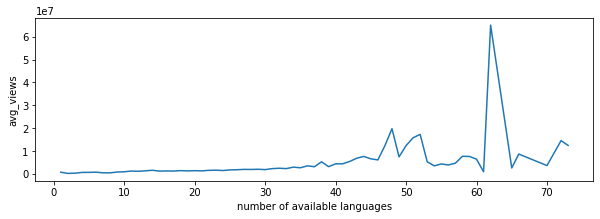

In [63]:
plt.rcParams['figure.figsize'] = (10,3) 
plt.plot(available_lang_views.index,available_lang_views.values)
plt.xlabel('number of available languages')
plt.ylabel('avg_views')

In [64]:
df

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},Empty,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['socie

In [65]:
df['comments'] = np.where(df['comments'].isnull(),'Empty',df['comments'])

In [66]:
series_without_empty_comments = df.loc[df['comments']!='Empty','comments']

In [67]:
series_without_empty_comments = series_without_empty_comments.apply(lambda x:eval(x))

In [68]:
series_without_empty_comments.sort_values(ascending=True).index

Int64Index([3898, 3893, 2943, 2949, 3867, 3666, 3694, 2865, 3842, 2714,
            ...
             796,  631,  799,  911, 1296,  197, 1735,  617,    4,   94],
           dtype='int64', length=3350)

In [69]:
views_comments_list = list()
for i in series_without_empty_comments.sort_values(ascending=True).index:
    views_comments_list.append(df.iloc[i,6])

In [70]:
comments_views_df = pd.DataFrame(views_comments_list,index = series_without_empty_comments.sort_values(ascending=True) , columns = ['views'])
grouped_comments_series = comments_views_df.groupby('comments')['views'].mean()

Text(0, 0.5, 'views')

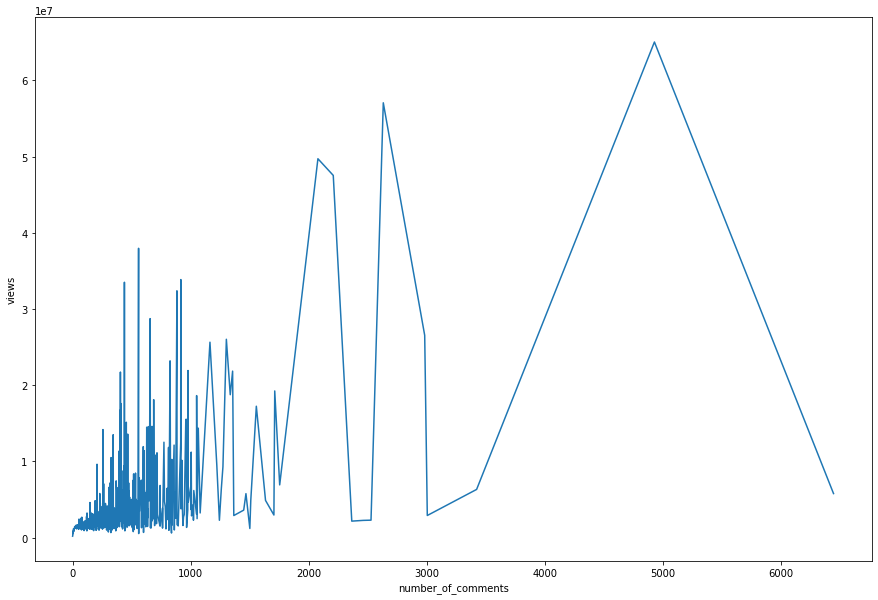

In [71]:
plt.rcParams['figure.figsize'] = (15,10) 
plt.plot(grouped_comments_series.index,grouped_comments_series.values)
plt.xlabel('number_of_comments')
plt.ylabel('views')

In [72]:
df.groupby('duration')['views'].mean()

duration
60       163277.0
78       138145.5
107       10356.0
109      198694.0
122      230354.0
          ...    
3503    1242418.0
3608    3028381.0
3740    1142208.0
3760     380451.0
3922    1493370.0
Name: views, Length: 1188, dtype: float64

Text(0, 0.5, 'avg_views')

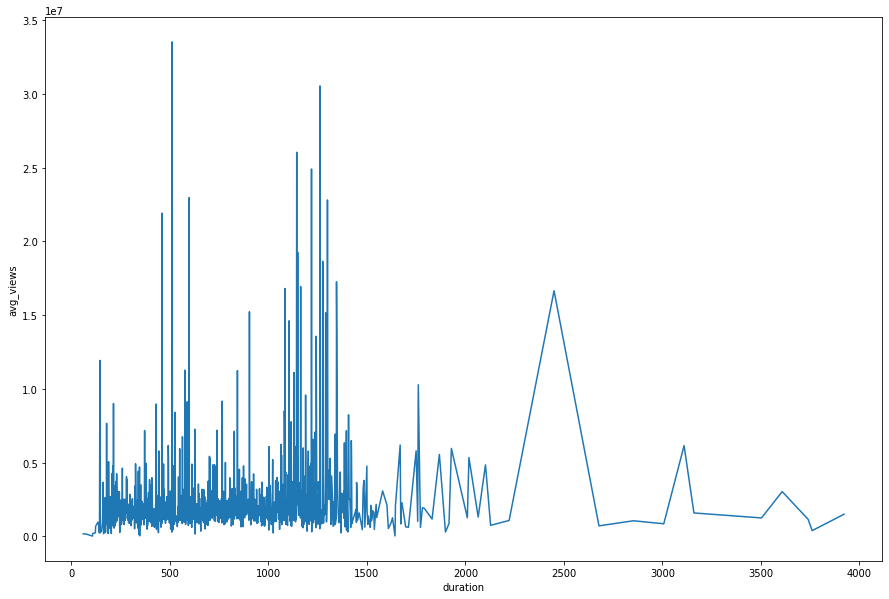

In [73]:
plt.plot(df.groupby('duration')['views'].mean().index,df.groupby('duration')['views'].mean().values)
plt.xlabel('duration')
plt.ylabel('avg_views')

In [74]:
df['topics'] = df['topics'].apply(lambda x: eval(x))

In [75]:
df['topics'][0]

['alternative energy',
 'cars',
 'climate change',
 'culture',
 'environment',
 'global issues',
 'science',
 'sustainability',
 'technology']